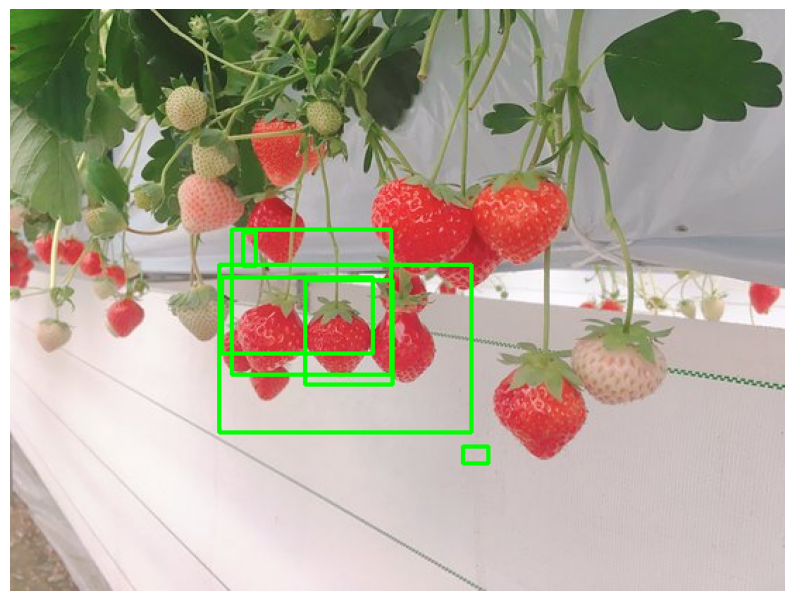

In [1]:
import cv2
import matplotlib.pyplot as plt

# Cargue la imagen
image_path = 'frutilla_test.png'
image = cv2.imread(image_path)

# Convertir BGR em RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dados los datos de las cajas que delimitan las frutillas maduras (como xmin, ymin, xmax, ymax)
bboxes = [[0.59631014,0.7275354,0.26942807,0.44018105],[0.617183,0.75146633,0.5848696,0.78123695],[0.30046052,0.38361126,0.31641042,0.44209588],[0.38071465,0.4653761,0.4943079,0.64433855],[0.28622153,0.37894878,0.4919012,0.6271911],[0.46749136,0.59172064,0.2741544,0.46195891],[0.30936596,0.39582893,0.16756943,0.30817148],[0.12177906,0.17371903,0.4858935,0.57599205],[0.47018304,0.5521964,0.48409277,0.6467964],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]


# Confianzas
confidences = [0.99997544,0.9999597,0.9999479,0.9999356,0.99988306,0.99987483,0.9816009,0.31590846,0.13224922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

# Certificar de que el número de cajas corresponda al número de confianzas
assert len(bboxes) == len(confidences)

# Filtrar cajas  delimitadoras con base en un límite de confianza
confidence_threshold = 0.9990000  # Defina um límite de confianza
filtered_boxes = [box for box, conf in zip(bboxes, confidences) if conf > confidence_threshold]

# Función para crear las cajas delimitadoras en la imagen
def draw_boxes(image, boxes):
    h, w, _ = image.shape  # Obtenga las dimenesiones de la imagen
    for box in boxes:
        # Convertir coordenadas relativas en absolutas
        xmin, ymin, xmax, ymax = box
        pt1 = (int(xmin * w), int(ymin * h))
        pt2 = (int(xmax * w), int(ymax * h))

        # Diseñe el retangulo
        image = cv2.rectangle(image, pt1, pt2, (0, 255, 0), 2)
    return image

# Diseñe las cajas delimitadoras en la imágen
boxed_image = draw_boxes(image, filtered_boxes)

# Exhibir la imagen con cajas delimitadoras
plt.figure(figsize=(10,10))
plt.imshow(boxed_image)
plt.axis('off') # Ocultar el eje
plt.show()